# ---LOSS FUNCTIONS FOR REGRESSION-----

In [ ]:
# ===============================
# Compare MSE, MAE, and Huber Loss in Deep Learning
# Author: Shreenidhi's Demo Script for Students
# ===============================

import torch
import torch.nn as nn      #nn for Neural Networks:-provides all the basic building blocks (called layers or modules)
import torch.optim as optim #module contains various optimization algorithms
import matplotlib.pyplot as plt

In [ ]:
# -------------------------------
# 1️⃣ Create a Simple Regression Dataset(created a dataset of 100 points)
# -------------------------------
# y = 3x + noise, with some outliers to show difference in loss behavior

# This dataset represents a straight line with some randomness and a few extreme values (outliers).
torch.manual_seed(42) #get the SAME "random" numbers.
#creates the input data (conventionally called X

X = torch.linspace(-5, 5, 100).unsqueeze(1) #generates 100 evenly spaced numbers between -5 and 5 (inclusive)
'''.unsqueeze(1): This method adds a new dimension to the tensor at index 1.
Before: It was a shape like [100].
After: It becomes a shape like [100, 1].'''

#creates the target data (conventionally called y) based on X, adding a linear relationship and some random noise.
y = 3 * X + torch.randn_like(X) * 2 # a noisy straight line defined by the equation y=3X+random_noise

# Add some strong outliers
y[::10] += 15

In [ ]:
# -------------------------------
# 2️⃣ Define a Simple Neural Network
# -------------------------------
class SimpleRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential( # holds a sequence of layers
            nn.Linear(1, 10), #first layer:-performs a linear transformation on the data (y=wx+b),layer takes 1 input feature and transforms it into 10 output features
            nn.ReLU(), #activation function
            nn.Linear(10, 1) #second and final layer(op layer)
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
# -------------------------------
# 3️⃣ Function to Train with a Given Loss
# -------------------------------
def train_model(loss_fn, loss_name, color):
    model = SimpleRegressor()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    losses = [] #store the loss value after each training step
    for epoch in range(200):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad() #resets the gradients (slopes) bcz Gradients accumulate by default
        loss.backward() #calculates the gradient of the loss with respect to every single trainable parameter in the network. This tells the optimizer how much and in which direction each parameter needs to be adjusted to reduce the loss.
        optimizer.step() #update all the model's parameters.
        losses.append(loss.item()) #current loss value is extracted

    # Plot fitted line
    plt.subplot(1, 2, 1)
    with torch.no_grad():
        y_fit = model(X)
        plt.plot(X, y_fit, label=f"{loss_name}", color=color)

    # Return loss curve for plotting
    return losses


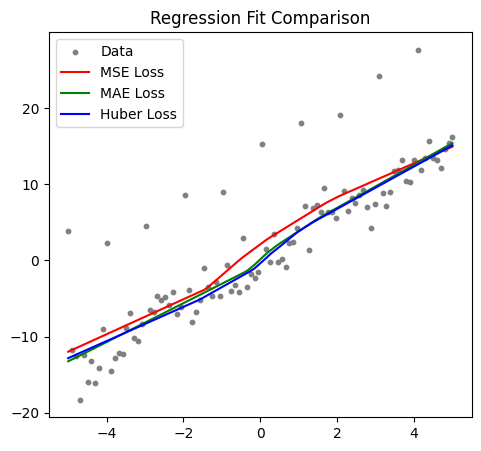

In [ ]:
# -------------------------------
# 4️⃣ Compare MSE, MAE, and Huber Loss
# -------------------------------
plt.figure(figsize=(12, 5))

# a) Fit Lines Comparison
plt.subplot(1, 2, 1)
plt.scatter(X, y, s=10, label="Data", color="gray")

plt.title("Regression Fit Comparison")

mse_losses = train_model(nn.MSELoss(), "MSE Loss", "red")
mae_losses = train_model(nn.L1Loss(), "MAE Loss", "green")
huber_losses = train_model(nn.SmoothL1Loss(beta=1.0), "Huber Loss", "blue")

plt.legend()


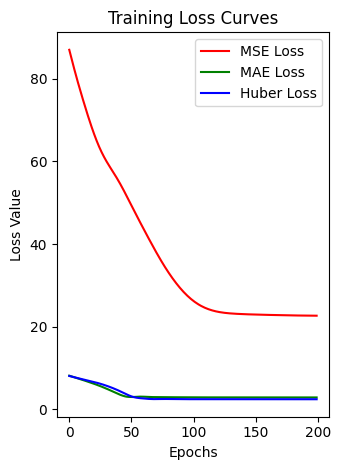

In [ ]:
# b) Training Loss Curves
plt.subplot(1, 2, 2)
plt.plot(mse_losses, label="MSE Loss", color="red")
plt.plot(mae_losses, label="MAE Loss", color="green")
plt.plot(huber_losses, label="Huber Loss", color="blue")
plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# -------------------------------
# 5️⃣ Print Observations
# -------------------------------
print("\n🔍 Observations:")
print("- MSE Loss heavily penalizes outliers, so it may fit poorly to normal points.")
print("- MAE Loss is more stable but converges slower because gradient is constant.")
print("- Huber Loss balances both — smooth convergence and robustness to outliers.")


🔍 Observations:
- MSE Loss heavily penalizes outliers, so it may fit poorly to normal points.
- MAE Loss is more stable but converges slower because gradient is constant.
- Huber Loss balances both — smooth convergence and robustness to outliers.


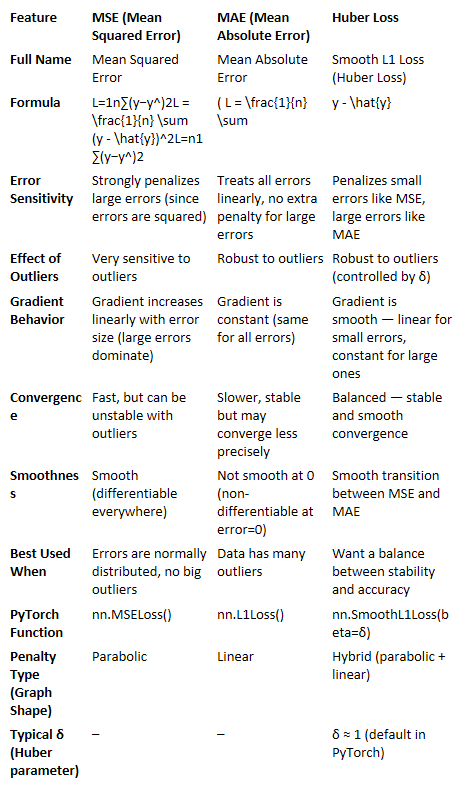

**Quick Intuition**

MSE: "Punishes big mistakes harshly."

MAE: "Treats all mistakes equally."

Huber: "Forgives big mistakes a bit, but not too much."

# ---LOSS FUNCTIONS FOR CLASSIFICATION-----

In [ ]:
# ==================================================
# Compare Binary Cross Entropy vs Categorical Cross Entropy
# Author: Shreenidhi's Demo Script for Students
# ==================================================
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs #generate a synthetic (fake) dataset(non-linearly separable)
from sklearn.model_selection import train_test_split

torch.manual_seed(42)

In [ ]:
# -----------------------------------------------
# 1️⃣ Binary Classification Dataset (2 classes)
# -----------------------------------------------
# generates a synthetic dataset shaped like two interlocking half-moons AND ensures same 400 points are generated
X_bin, y_bin = make_moons(n_samples=400, noise=0.2, random_state=42)
X_bin = torch.tensor(X_bin, dtype=torch.float32) #Stores the input features
y_bin = torch.tensor(y_bin, dtype=torch.float32).unsqueeze(1) #Stores the target labels

In [ ]:
# -----------------------------------------------
# 2️⃣ Multi-class Dataset (3 classes)
# -----------------------------------------------
X_cat, y_cat = make_blobs(n_samples=400, centers=3, random_state=42, cluster_std=2.0) #data points grouped in distinct "blobs" or clusters.
X_cat = torch.tensor(X_cat, dtype=torch.float32) #input features (coordinates)
y_cat = torch.tensor(y_cat, dtype=torch.long) #target labels (class assignments: 0, 1, or 2)

In [ ]:
# -----------------------------------------------
# 3️⃣ Simple Neural Network for Binary Classification
# -----------------------------------------------
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
# -----------------------------------------------
# 4️⃣ Simple Neural Network for Multiclass Classification
# -----------------------------------------------
class MultiClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # 3 output classes
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
# -----------------------------------------------
# 5️⃣ Training Function
# -----------------------------------------------
def train_model(model, X, y, loss_fn, epochs=200, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return model, losses

In [ ]:
# -----------------------------------------------
# 6️⃣ Train Binary Classifier (BCE)
# -----------------------------------------------
model_bin = BinaryClassifier()
bce_loss_fn = nn.BCELoss()
model_bin, bce_losses = train_model(model_bin, X_bin, y_bin, bce_loss_fn)

In [ ]:
# -----------------------------------------------
# 7️⃣ Train Multi-class Classifier (CCE)
# -----------------------------------------------
model_cat = MultiClassifier()
cce_loss_fn = nn.CrossEntropyLoss()
model_cat, cce_losses = train_model(model_cat, X_cat, y_cat, cce_loss_fn)


/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0, 0.5, 'Feature 2')

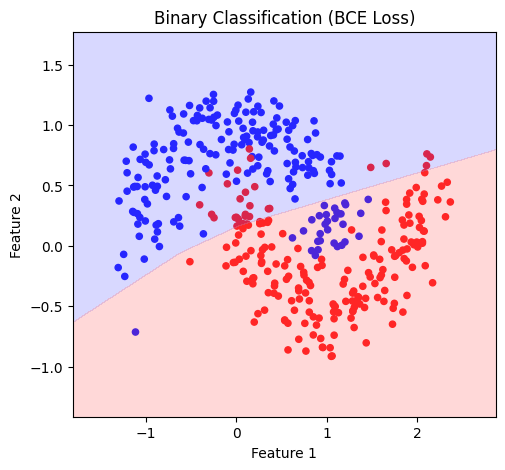

In [ ]:
# -----------------------------------------------
# 8️⃣ Plot Decision Boundaries and Loss Curves
# -----------------------------------------------
plt.figure(figsize=(12,5))

# -- Binary decision boundary --
plt.subplot(1,2,1)
plt.title("Binary Classification (BCE Loss)")
plt.scatter(X_bin[:,0], X_bin[:,1], c=y_bin.squeeze(), cmap='bwr', s=20)
x_min, x_max = X_bin[:,0].min()-0.5, X_bin[:,0].max()+0.5
y_min, y_max = X_bin[:,1].min()-0.5, X_bin[:,1].max()+0.5
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
with torch.no_grad():
    zz = model_bin(grid).reshape(xx.shape)
plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.3, cmap='bwr')
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")

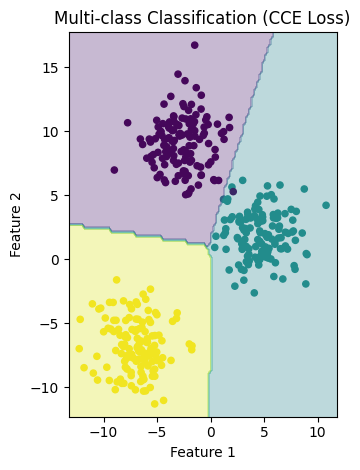

In [ ]:
# -- Multi-class decision boundary --
plt.subplot(1,2,2)
plt.title("Multi-class Classification (CCE Loss)")
plt.scatter(X_cat[:,0], X_cat[:,1], c=y_cat, cmap='viridis', s=20)
x_min, x_max = X_cat[:,0].min()-1, X_cat[:,0].max()+1
y_min, y_max = X_cat[:,1].min()-1, X_cat[:,1].max()+1
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), torch.linspace(y_min, y_max, 100))
grid = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)], dim=1)
with torch.no_grad():
    zz = model_cat(grid)
    zz = torch.argmax(zz, dim=1).reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.3, cmap='viridis')
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

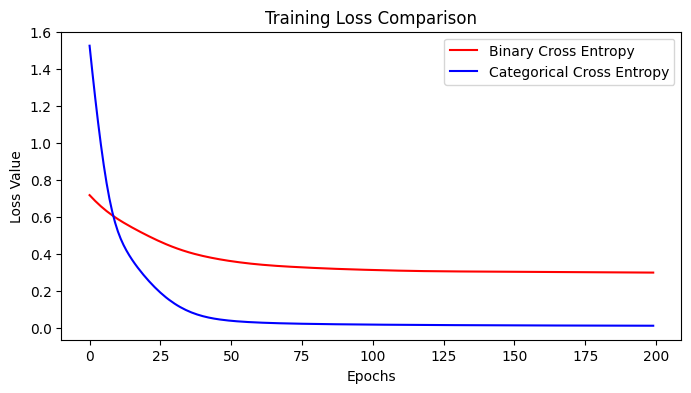

In [ ]:
# -----------------------------------------------
# 9️⃣ Plot Training Loss Curves
# -----------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(bce_losses, label="Binary Cross Entropy", color="red")
plt.plot(cce_losses, label="Categorical Cross Entropy", color="blue")
plt.xlabel("Epochs"); plt.ylabel("Loss Value")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()

In [ ]:
# -----------------------------------------------
# 🔍 Observations
# -----------------------------------------------
print("\n🔍 Observations:")
print("- Binary Cross Entropy is used for 2-class problems (output ∈ [0,1]) with Sigmoid.")
print("- Categorical Cross Entropy is used for multi-class problems (output = class logits) with Softmax internally.")
print("- BCE predicts *probability of class 1*, while CCE predicts *probability for each class*.")


🔍 Observations:
- Binary Cross Entropy is used for 2-class problems (output ∈ [0,1]) with Sigmoid.
- Categorical Cross Entropy is used for multi-class problems (output = class logits) with Softmax internally.
- BCE predicts *probability of class 1*, while CCE predicts *probability for each class*.


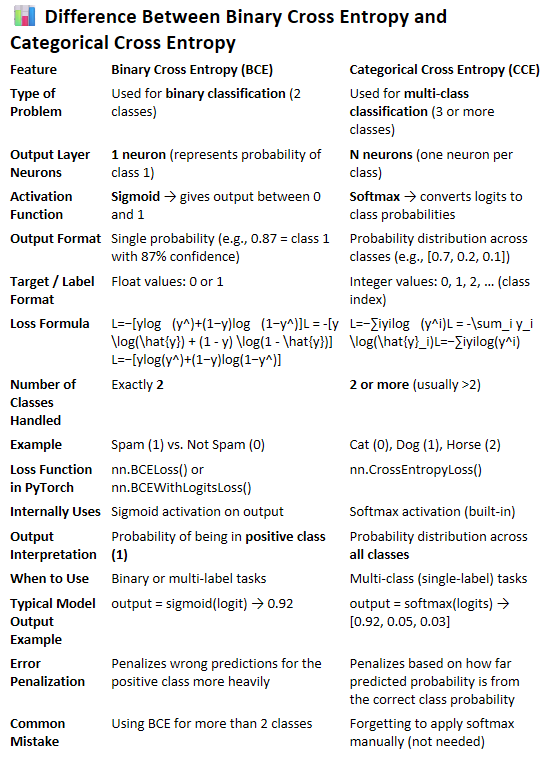

**Concept	Analogy**
BCE	Asking: “Is this image a cat or not a cat?”
CCE	Asking: “Is this image a cat, dog, or horse?”



# -----ACTIVATION FUNCTION -----

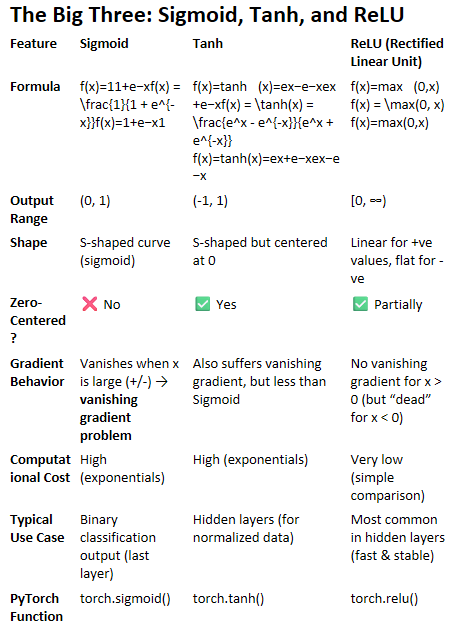

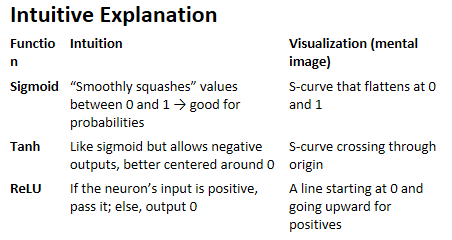

In [ ]:
# ==========================================
# Activation Function Visualization Script
# Author: Shreenidhi's Demo Script for Students
# ==========================================
import torch
import torch.nn.functional as F #module containing various non-linear activation functions (like ReLU, sigmoid, softmax)
import matplotlib.pyplot as plt


In [ ]:
# Input range
x = torch.linspace(-10, 10, 200) #200 evenly spaced numbers between -10 and 10

# Compute activations
sigmoid_y = torch.sigmoid(x)
tanh_y = torch.tanh(x)
relu_y = F.relu(x)

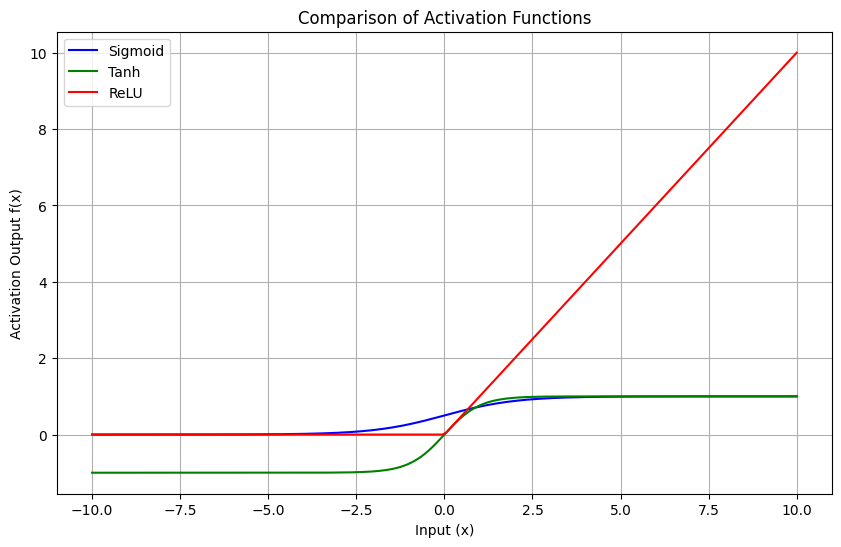

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_y, label='Sigmoid', color='blue')
plt.plot(x, tanh_y, label='Tanh', color='green')
plt.plot(x, relu_y, label='ReLU', color='red')
plt.title("Comparison of Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Activation Output f(x)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("\n🔍 Observations:")
print("1️⃣ Sigmoid squashes inputs to (0, 1) — useful for probability outputs.")
print("2️⃣ Tanh squashes inputs to (-1, 1) — better for hidden layers than sigmoid.")
print("3️⃣ ReLU is simple and fast — dominant in modern deep networks.")


🔍 Observations:
1️⃣ Sigmoid squashes inputs to (0, 1) — useful for probability outputs.
2️⃣ Tanh squashes inputs to (-1, 1) — better for hidden layers than sigmoid.
3️⃣ ReLU is simple and fast — dominant in modern deep networks.


######################################

In [ ]:
# =======================================================
# Compare Sigmoid, Tanh, and ReLU in a Deep Learning Model
# Author: Shreenidhi’s Classroom Demo Script
# =======================================================
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# --------------------------------------------
# 1️⃣ Create a Toy Regression Dataset (y = sin(x))
# --------------------------------------------
torch.manual_seed(42)
X = torch.unsqueeze(torch.linspace(-3, 3, 200), dim=1)
y = torch.sin(X) + 0.1 * torch.randn(X.size())

In [ ]:
# --------------------------------------------
# 2️⃣ Define a Simple Neural Network Template
# --------------------------------------------
class SimpleNet(nn.Module):
    def __init__(self, activation_fn):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            activation_fn,
            nn.Linear(20, 20),
            activation_fn,
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
# --------------------------------------------
# 3️⃣ Train Model Function
# --------------------------------------------
def train_model(model, name, color):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()
    losses = []

    for epoch in range(300):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return model, losses

In [ ]:
# --------------------------------------------
# 4️⃣ Train Three Models with Different Activations
# --------------------------------------------
activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU()
}

In [ ]:
colors = {"Sigmoid": "blue", "Tanh": "green", "ReLU": "red"}
models, all_losses = {}, {}

In [ ]:
for name, act in activations.items():
    model = SimpleNet(act)
    trained_model, losses = train_model(model, name, colors[name])
    models[name] = trained_model
    all_losses[name] = losses

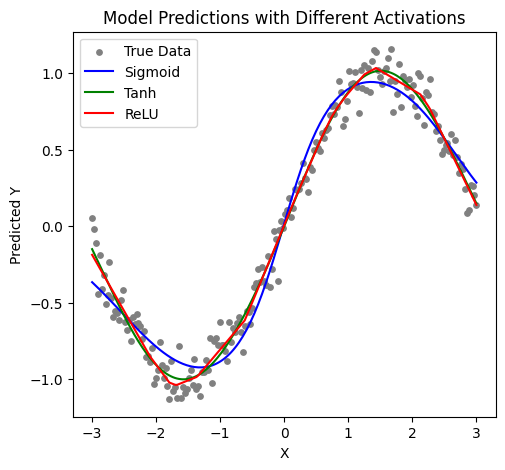

In [ ]:
# --------------------------------------------
# 5️⃣ Plot Predictions
# --------------------------------------------
plt.figure(figsize=(12,5))

# a) Predicted vs True Curve
plt.subplot(1,2,1)
plt.scatter(X.numpy(), y.numpy(), label="True Data", color="gray", s=15)
for name, model in models.items():
    with torch.no_grad():
        y_pred = model(X)
    plt.plot(X.numpy(), y_pred.numpy(), label=f"{name}", color=colors[name])
plt.title("Model Predictions with Different Activations")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.legend()

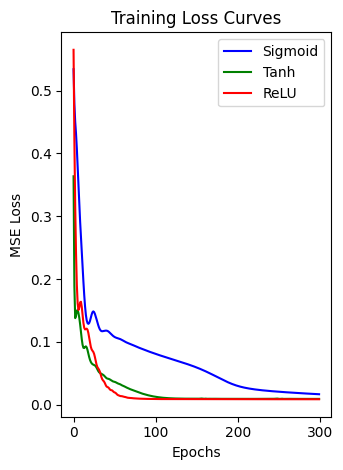

In [ ]:
# b) Training Loss Curves
plt.subplot(1,2,2)
for name, losses in all_losses.items():
    plt.plot(losses, label=f"{name}", color=colors[name])
plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------
# 6️⃣ Observations
# --------------------------------------------
print("\n🔍 Observations:")
print("1️⃣ Sigmoid: Converges slowly; output saturates for large |x| → vanishing gradient.")
print("2️⃣ Tanh: Slightly better than Sigmoid but still slower; smoother transitions.")
print("3️⃣ ReLU: Fast and stable convergence; captures sine pattern well.")


🔍 Observations:
1️⃣ Sigmoid: Converges slowly; output saturates for large |x| → vanishing gradient.
2️⃣ Tanh: Slightly better than Sigmoid but still slower; smoother transitions.
3️⃣ ReLU: Fast and stable convergence; captures sine pattern well.


| **Property**             | **Sigmoid**                            | **Tanh (Hyperbolic Tangent)**                        | **ReLU (Rectified Linear Unit)**                           |                            |   |                       |                                                           |
| ------------------------ | -------------------------------------- | ---------------------------------------------------- | ---------------------------------------------------------- | -------------------------- | - | --------------------- | --------------------------------------------------------- |
| **Mathematical Formula** | ( \sigma(x) = \frac{1}{1 + e^{-x}} )   | ( \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} ) | ( f(x) = \max(0, x) )                                      |                            |   |                       |                                                           |
| **Output Range**         | (0, 1)                                 | (-1, 1)                                              | [0, ∞)                                                     |                            |   |                       |                                                           |
| **Non-linearity**        | Yes                                    | Yes                                                  | Yes                                                        |                            |   |                       |                                                           |
| **Zero-centered Output** | ❌ No                                   | ✅ Yes                                                | ❌ No                                                       |                            |   |                       |                                                           |
| **Gradient Behavior**    | Gradients vanish for large             | x                                                    | (slow learning)                                            | Gradients vanish for large | x | but less than sigmoid | No vanishing gradient for x > 0, but 0 gradient for x ≤ 0 |
| **Computation Cost**     | High (exponentials)                    | High (exponentials)                                  | Very low (simple threshold)                                |                            |   |                       |                                                           |
| **Saturation Problem**   | Yes (for large                         | x                                                    | )                                                          | Yes (for large             | x | )                     | Only for x ≤ 0 (dead neurons)                             |
| **Typical Use**          | Output layer for binary classification | Hidden layers (before ReLU became popular)           | Most hidden layers in modern networks                      |                            |   |                       |                                                           |
| **Smoothness**           | Smooth and differentiable everywhere   | Smooth and differentiable everywhere                 | Not differentiable at x = 0 (but handled fine in practice) |                            |   |                       |                                                           |
| **Mean Output**          | Always positive → shifts activations   | Centered around zero → better convergence            | Non-negative → may cause bias in next layer                |                            |   |                       |                                                           |


# -----OPTIMIZERS----------------

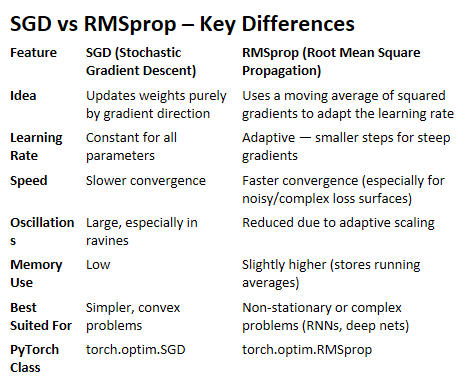

In [1]:
"""
Title: Visualizing SGD vs RMSprop
Goal: Help students understand how different optimizers move toward the minimum.
Author: Shreenidhi T H
"""

# -----------------------------
# 🧠 1. Import Required Libraries
# -----------------------------
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# ⚙️ 2. Define a Simple Loss Function
# -----------------------------
# We’ll use a simple quadratic function (bowl-shaped):
# f(x, y) = x² + y²
def loss_function(x, y):
    return x**2 + y**2

# Gradient of the loss function (partial derivatives)
def gradients(x, y):
    return 2*x, 2*y


In [2]:
# -----------------------------
# 🚀 3. Implement SGD Optimizer
# -----------------------------
def sgd(lr=0.1, steps=30):
    print("Running SGD...")
    x, y = 2.0, 2.0   # starting point
    trajectory = [(x, y)]

    for i in range(steps):
        dx, dy = gradients(x, y)
        # Update rule for SGD
        x -= lr * dx
        y -= lr * dy
        trajectory.append((x, y))
        print(f"Step {i+1}: x={x:.4f}, y={y:.4f}")

    return np.array(trajectory)

In [3]:
# -----------------------------
# ⚡ 4. Implement RMSprop Optimizer
# -----------------------------
def rmsprop(lr=0.1, steps=30, beta=0.9, epsilon=1e-8):
    print("\nRunning RMSprop...")
    x, y = 2.0, 2.0
    sx, sy = 0, 0  # moving average of squared gradients
    trajectory = [(x, y)]

    for i in range(steps):
        dx, dy = gradients(x, y)
        # RMSprop update rule
        sx = beta * sx + (1 - beta) * dx**2
        sy = beta * sy + (1 - beta) * dy**2
        x -= (lr / (np.sqrt(sx) + epsilon)) * dx
        y -= (lr / (np.sqrt(sy) + epsilon)) * dy
        trajectory.append((x, y))
        print(f"Step {i+1}: x={x:.4f}, y={y:.4f}")

    return np.array(trajectory)


In [4]:
# -----------------------------
# 🧩 5. Generate the Optimization Paths
# -----------------------------
sgd_path = sgd(lr=0.1)
rmsprop_path = rmsprop(lr=0.1)


Running SGD...
Step 1: x=1.6000, y=1.6000
Step 2: x=1.2800, y=1.2800
Step 3: x=1.0240, y=1.0240
Step 4: x=0.8192, y=0.8192
Step 5: x=0.6554, y=0.6554
Step 6: x=0.5243, y=0.5243
Step 7: x=0.4194, y=0.4194
Step 8: x=0.3355, y=0.3355
Step 9: x=0.2684, y=0.2684
Step 10: x=0.2147, y=0.2147
Step 11: x=0.1718, y=0.1718
Step 12: x=0.1374, y=0.1374
Step 13: x=0.1100, y=0.1100
Step 14: x=0.0880, y=0.0880
Step 15: x=0.0704, y=0.0704
Step 16: x=0.0563, y=0.0563
Step 17: x=0.0450, y=0.0450
Step 18: x=0.0360, y=0.0360
Step 19: x=0.0288, y=0.0288
Step 20: x=0.0231, y=0.0231
Step 21: x=0.0184, y=0.0184
Step 22: x=0.0148, y=0.0148
Step 23: x=0.0118, y=0.0118
Step 24: x=0.0094, y=0.0094
Step 25: x=0.0076, y=0.0076
Step 26: x=0.0060, y=0.0060
Step 27: x=0.0048, y=0.0048
Step 28: x=0.0039, y=0.0039
Step 29: x=0.0031, y=0.0031
Step 30: x=0.0025, y=0.0025

Running RMSprop...
Step 1: x=1.6838, y=1.6838
Step 2: x=1.4739, y=1.4739
Step 3: x=1.3087, y=1.3087
Step 4: x=1.1698, y=1.1698
Step 5: x=1.0489, y=1.0489

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


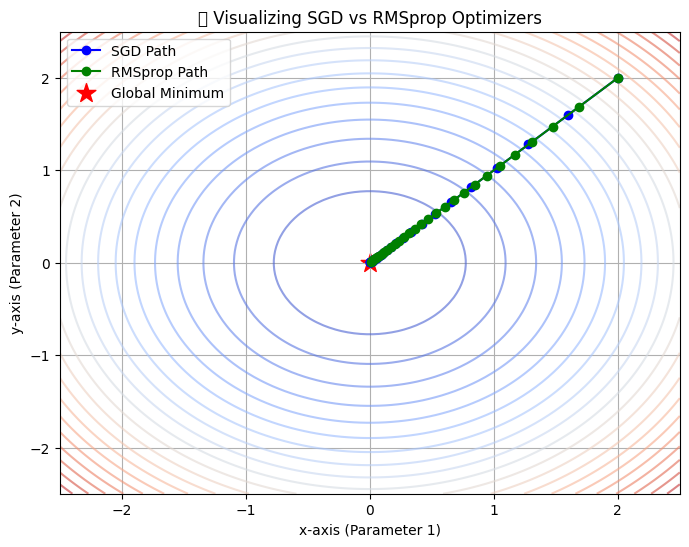

In [5]:
# -----------------------------
# 🎨 6. Visualize the Trajectories
# -----------------------------
x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = loss_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='coolwarm', alpha=0.6)

# Plot the optimizer paths
plt.plot(sgd_path[:,0], sgd_path[:,1], 'o-', color='blue', label='SGD Path')
plt.plot(rmsprop_path[:,0], rmsprop_path[:,1], 'o-', color='green', label='RMSprop Path')

plt.scatter(0, 0, color='red', marker='*', s=200, label='Global Minimum')
plt.title("🎯 Visualizing SGD vs RMSprop Optimizers")
plt.xlabel("x-axis (Parameter 1)")
plt.ylabel("y-axis (Parameter 2)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# -----------------------------
# 📘 7. Summary for Students
# -----------------------------
print("\n🔍 Summary:")
print("➡ SGD moves in equal steps — simple but slow convergence.")
print("➡ RMSprop adapts its step size using gradient history — faster and smoother convergence.")
print("➡ Both try to reach the same global minimum at (0,0).")


🔍 Summary:
➡ SGD moves in equal steps — simple but slow convergence.
➡ RMSprop adapts its step size using gradient history — faster and smoother convergence.
➡ Both try to reach the same global minimum at (0,0).


In [7]:
"""
Title: Comparing Optimizers (SGD vs RMSprop vs Adam)
Goal: Visualize how different optimizers affect neural network training.
Dataset: MNIST Handwritten Digits
Author: SHREENIDHI T H
"""

# -----------------------------
# 🧠 1. Import Libraries
# -----------------------------
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [8]:
# -----------------------------
# 📦 2. Load and Prepare Dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize to [0,1]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# -----------------------------
# 🧩 3. Define a Simple Neural Network
# -----------------------------
def create_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [10]:
# -----------------------------
# ⚙️ 4. Train the Model with Different Optimizers
# -----------------------------
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

histories = {}

for name, opt in optimizers.items():
    print(f"\n🚀 Training with {name} optimizer...")
    model = create_model(opt)
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=1
    )
    histories[name] = history



🚀 Training with SGD optimizer...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4619 - loss: 1.7891 - val_accuracy: 0.8537 - val_loss: 0.6088
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8593 - loss: 0.5508 - val_accuracy: 0.8927 - val_loss: 0.3977
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8903 - loss: 0.3969 - val_accuracy: 0.9079 - val_loss: 0.3347
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9036 - loss: 0.3395 - val_accuracy: 0.9149 - val_loss: 0.3052
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9142 - loss: 0.3073 - val_accuracy: 0.9220 - val_loss: 0.2843

🚀 Training with RMSprop optimizer...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8404 - loss: 0.5508 - val_accuracy: 0.9533 - val_loss: 0.1604
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9542 - loss: 0.1511 - val_accuracy: 0.9662 - val_loss: 0.1089
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9707 - l

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


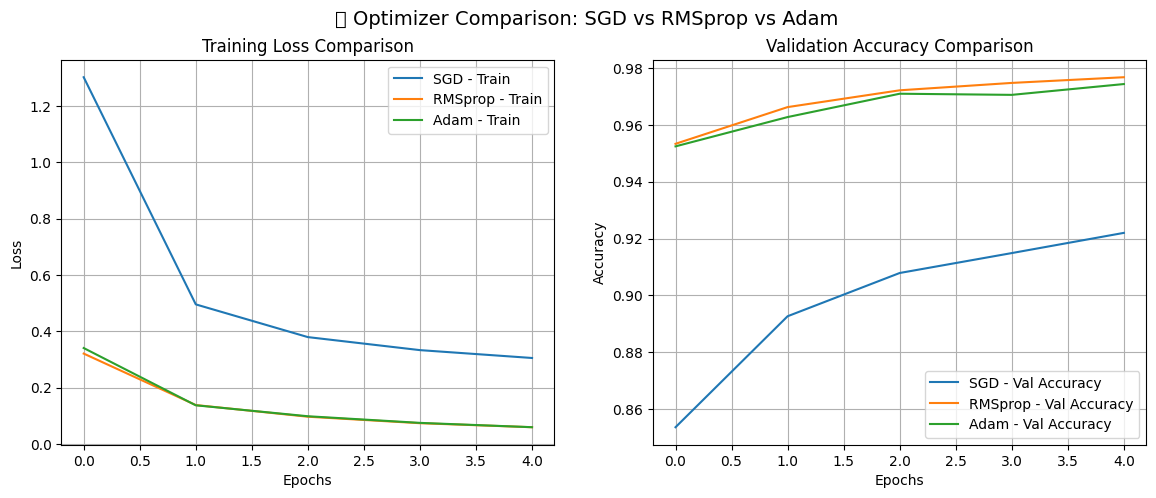

In [11]:
# -----------------------------
# 🎨 5. Visualization
# -----------------------------
plt.figure(figsize=(14, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
for name, hist in histories.items():
    plt.plot(hist.history['loss'], label=f'{name} - Train')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=f'{name} - Val Accuracy')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.suptitle("🧩 Optimizer Comparison: SGD vs RMSprop vs Adam", fontsize=14)
plt.show()


In [12]:
# -----------------------------
# 📘 6. Final Summary
# -----------------------------
print("\n🔍 Summary for Students:")
print("➡ SGD: Slower learning, may take more epochs to converge.")
print("➡ RMSprop: Adapts learning rate, converges faster.")
print("➡ Adam: Combines RMSprop + Momentum, fastest and most stable in most cases.")


🔍 Summary for Students:
➡ SGD: Slower learning, may take more epochs to converge.
➡ RMSprop: Adapts learning rate, converges faster.
➡ Adam: Combines RMSprop + Momentum, fastest and most stable in most cases.
